In [ ]:
%%shell
jupyter nbconvert --to html .ipynb

#Text mining

##Source and Link:

<b>[sentiment analysis on Twitter data (Data set)](https://www.kaggle.com/code/xvivancos/eda-tweets-during-cavaliers-vs-warriors/input)</b>

<b>[Project Documentation Link](https://drive.google.com/drive/folders/1nitMIykLinFD7geLrAWNRR4Hqrb9Mxpf?usp=sharing)</b>


## 1. The necessary Libraries

In [185]:
# libray for managing warnings
import warnings

# pandas and numpy for data manipulation & numerical computations
import pandas as pd
import numpy as np

# seaborn and matplotlip for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# sklearn libirary imports for preprocessing, modeling, and model eavluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# display plot in the same cell
%matplotlib inline

# display max df columns
pd.set_option('display.max_columns', None)

# setting the seaborn style
sns.set(style="darkgrid")

# ignore warnings
warnings.filterwarnings('ignore')

## 2. Load the data set

In [186]:
df = pd.read_csv('TweetsNBA.csv', encoding='latin-1')

In [187]:
# first 5 rows
df.head()

,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,listed_count,verified,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,utc_offset,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
0,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0.0,0.0,False,False,1.000000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,7.0,False,NaN,2.348888e+08,I am Ava :)) ?I LOVE #TWD #FTWD just a gal ???...,True,Thu Jan 06 20:41:19 +0000 2011,5860.0,285.0,12836.0,False,NaN,Ava,NaN,en,NaN,806.0,avakrutko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ja comecou e eu no onibus https://t.co/wPgRLw...,0.0,0.0,False,False,1.000000e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,pt,1.0,False,"Rio de Janeiro, Brasil",8.600000e+17,+5521?2.0\r\n Flamenguista nao sou so mais um...,True,Thu May 04 09:46:22 +0000 2017,2200.0,113.0,1963.0,False,NaN,Markinho,NaN,pt,NaN,119.0,Marcoosloco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://twitter.com/NBA/status/100447552030887...,https://t.co/wPgRLwdg1O
2,lets go Cavs\r\n#WhateverItTakes \r\n#NBAFinals,0.0,0.0,False,False,1.000000e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,0.0,False,"Naga City, Bicol Region",8.780000e+17,NaN,False,Sat Jun 24 03:16:12 +0000 2017,578.0,380.0,736.0,False,http://Instagram.com/wrenzjudd,WR E N Z,NaN,en,NaN,319.0,wrenzberja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RT @cavs: #NBAFinals GAME 3 STARTERS:\r\n\r\n@...,0.0,0.0,False,False,1.000000e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,4.0,False,"Niterói, Brasil",3.473700e+09,@Flamengo,False,Fri Aug 28 21:58:35 +0000 2015,67308.0,520.0,17161.0,False,NaN,GB,NaN,pt,NaN,171.0,duartegabriel35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RT @NBA: Count down @StephenCurry30's TOP 5 t...,0.0,0.0,False,False,1.000000e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:25 +0000 2018,NaN,NaN,en,1.0,False,"Lawrence, MA",9.520000e+17,22?,True,Fri Jan 12 15:12:18 +0000 2018,10357.0,805.0,4057.0,False,NaN,NG,NaN,en,NaN,326.0,NgDaizha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# last 5 rows
df.tail()

,text,retweet_count,favorite_count,favorited,truncated,id_str,in_reply_to_screen_name,source,retweeted,created_at,in_reply_to_status_id_str,in_reply_to_user_id_str,lang,listed_count,verified,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,user_url,name,time_zone,user_lang,utc_offset,friends_count,screen_name,country_code,country,place_type,full_name,place_name,place_id,place_lat,place_lon,lat,lon,expanded_url,url
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Checks

In [189]:
# shape
df.shape

(9998, 43)

In [190]:
# data types
df.dtypes

text                          object
retweet_count                float64
favorite_count               float64
favorited                     object
truncated                     object
id_str                       float64
in_reply_to_screen_name       object
source                        object
retweeted                     object
created_at                    object
in_reply_to_status_id_str    float64
in_reply_to_user_id_str      float64
lang                          object
listed_count                 float64
verified                      object
location                      object
user_id_str                  float64
description                   object
geo_enabled                   object
user_created_at               object
statuses_count               float64
followers_count              float64
favourites_count             float64
protected                     object
user_url                      object
name                          object
time_zone                    float64
u

In [191]:
# check missing values
# percentage of missing values in each column
total_missing = df.isnull().sum().sort_values(ascending = False)
missing_percent = (total_missing / len(df)) * 100
table = pd.concat([total_missing,missing_percent], axis=1, keys=['Total','Percentage %'])
table

,Total,Percentage %
time_zone,9998,100.000000
utc_offset,9998,100.000000
lon,9996,99.979996
lat,9996,99.979996
in_reply_to_status_id_str,9939,99.409882
in_reply_to_screen_name,9874,98.759752
in_reply_to_user_id_str,9874,98.759752
full_name,9672,96.739348
country_code,9672,96.739348
place_lon,9672,96.739348


In [192]:
# Check Duplicates
total_dupliactes = df.duplicated().sum()
dupliactes_percent = (total_dupliactes / len(df)) * 100
table = pd.DataFrame({'Total':[total_dupliactes],'Percentage %':[dupliactes_percent]})
table

,Total,Percentage %
0,4005,40.058012


In [193]:
# check outliers
def outliers(df):
    #  first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # IQR
    IQR = Q3 - Q1

    out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

    return out

In [194]:
# total number of outliers in each features
total = []
for col in df.columns[[1,2,3,10,11]]:
    total.append(len(outliers(df[col])))


# data frame to display total number of outliers in each features

outlier_df = pd.DataFrame(
    data = {'Features' : df.columns[[1,2,3,10,11]],
          'Total Outliers' : total}).set_index('Features')
outlier_df

,Total Outliers
Features,
retweet_count,0
favorite_count,0
favorited,0
in_reply_to_status_id_str,0
in_reply_to_user_id_str,25


In [195]:
# total number of outliers in each features
total = []
for col in df.columns[[1,2,3,10,11]]:
    total.append(len(outliers(df[col])))


# data frame to display total number of outliers in each features

outlier_df = pd.DataFrame(
    data = {'Features' : df.columns[[1,2,3,10,11]],
          'Total Outliers' : total}).set_index('Features')
outlier_df

,Total Outliers
Features,
retweet_count,0
favorite_count,0
favorited,0
in_reply_to_status_id_str,0
in_reply_to_user_id_str,25


### Insights:
* There are 6000 observation and 44 column.
* There are categorical features need to be mapped before modeling.
* The data contain missing values in many features need to be handled.
* The data doesn't contain 1 coulmn outliers.


##4    Preprocessing (1)

### 4.1 Duplicates

In [196]:
# dropping duplicates as they are not necessary for the analysis.
df.drop_duplicates(inplace=True)


In [197]:
# check duplicates
df.duplicated().sum()

0

### 4.2 Missing Values
*  the mean is used to replace missing values in numerical columns.
(no alot outliers)

 the mode is used to fill  the missing values in categorical columns.

In [198]:
#delete The columns do not contain any value and the columns are incomprehensible.
df = df.drop(["retweet_count","place_lat","user_url","full_name","country_code","user_url","full_name","user_url","place_id","place_lon", "favorite_count","in_reply_to_user_id_str","verified","time_zone","utc_offset","lat","lon","url","expanded_url","in_reply_to_screen_name","favorited","in_reply_to_user_id_str"], axis=1)

In [199]:
# filling numerical coulmns with mean.

df['listed_count'].fillna(round(df['listed_count'].mean()), inplace=True)
df['statuses_count'].fillna(round(df['statuses_count'].mean()), inplace=True)
df['followers_count'].fillna(round(df['followers_count'].mean()), inplace=True)
df['favourites_count'].fillna(round(df['favourites_count'].mean()), inplace=True)
df['id_str'].fillna(round(df['id_str'].mean()), inplace=True)
df['friends_count'].fillna(round(df['friends_count'].mean()), inplace=True)

In [200]:
#filling  categorical columns with mode.
df['in_reply_to_status_id_str'].fillna(df['in_reply_to_status_id_str'].mode()[0], inplace=True)
df['place_name'].fillna(df['place_name'].mode()[0], inplace=True)
df['text'].fillna(df['text'].mode()[0], inplace=True)
df['screen_name'].fillna(df['screen_name'].mode()[0], inplace=True)
df['place_type'].fillna(df['place_type'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['description'].fillna(df['description'].mode()[0], inplace=True)


In [201]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [202]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [203]:
# check missing values
df.isnull().sum()

text                         0
truncated                    0
id_str                       0
source                       0
retweeted                    0
created_at                   0
in_reply_to_status_id_str    0
lang                         0
listed_count                 0
location                     0
user_id_str                  0
description                  0
geo_enabled                  0
user_created_at              0
statuses_count               0
followers_count              0
favourites_count             0
protected                    0
name                         0
user_lang                    0
friends_count                0
screen_name                  0
country                      0
place_type                   0
place_name                   0
dtype: int64

In [204]:
# shape after cleaning
df.shape

(5993, 25)

## 5. Sampling
* Because stratified random sampling eliminates bias and represents the distribution of the data, it is recommended
* A sample of 100% has been taken from the twiter based on Risk Flag.

In [205]:
geo_enabled = df['geo_enabled'].value_counts(normalize=True)
geo_enabled

True     0.590022
False    0.409978
Name: geo_enabled, dtype: float64

In [206]:
geo_enabled_false = df[df['geo_enabled'] == False].sample(round((len(df)*0.55)*(geo_enabled[False])))
geo_enabled_true = df[df['geo_enabled'] == True].sample(round((len(df)*0.55)*(geo_enabled[True])))

In [207]:
sampled_df = pd.concat([geo_enabled_false, geo_enabled_true])
sampled_df

,text,truncated,id_str,source,retweeted,created_at,in_reply_to_status_id_str,lang,listed_count,location,user_id_str,description,geo_enabled,user_created_at,statuses_count,followers_count,favourites_count,protected,name,user_lang,friends_count,screen_name,country,place_type,place_name
4505,RT @NBA: Here come the @warriors! #NBAFinals\r...,False,1.000000e+18,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:18:01 +0000 2018,1.000000e+18,en,3.0,"Watkins Glen, NY",9.100000e+17,"beach lover, wife, mother, sister, daughter, a...",False,Mon Sep 18 21:28:41 +0000 2017,27689.0,745.0,38569.0,False,Sue Morton,en,124.0,SueMort04029256,United States,city,Georgia
3142,Go GSW!\r\n#NBAonABS-CBN\r\n#NBAfinals https:/...,False,1.000000e+18,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:16:55 +0000 2018,1.000000e+18,tl,0.0,"Malilipot, Bicol Region",9.680000e+17,"Stop and look around, this life is pretty amazing",False,Mon Feb 26 06:26:20 +0000 2018,5.0,2.0,106.0,False,Christine Bañas,en,30.0,BanasChristine,United States,city,Georgia
2615,Pa shout out sa Family Adriano :-)\r\nAnd sa D...,True,1.000000e+18,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:16:25 +0000 2018,1.000000e+18,en,0.0,Japan,1.000000e+18,@Sidecastr for iPad is the ultimate 'live or l...,False,Wed Jun 06 03:12:35 +0000 2018,22.0,3.0,8.0,False,Y E N <ed><U+00A0><U+00BD><ed><U+00B1><U+00BD>,en,23.0,xkaiynx,United States,city,Georgia
1458,I'm going to let the #NBAFinals continue in bu...,True,1.000000e+18,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:15:29 +0000 2018,1.000000e+18,en,8.0,"Baltimore, Maryland",2.927318e+08,"Christian, husband, father, Pastor of Walk By ...",False,Wed May 04 04:01:33 +0000 2011,23088.0,977.0,1354.0,False,Damon Dorsey,en,429.0,damedorse,United States,city,Georgia
2769,#NBAFinals,False,1.000000e+18,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:16:34 +0000 2018,1.000000e+18,und,0.0,United States,2.947708e+09,@Sidecastr for iPad is the ultimate 'live or l...,False,Mon Dec 29 01:16:01 +0000 2014,561.0,44.0,2708.0,False,Eququeen,en,117.0,EcuQueen1986,United States,city,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,RT @Arabic1_NBA: ???????????????? ????????????...,False,1.000000e+18,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:17:37 +0000 2018,1.000000e+18,ar,12.0,Riyadh / Jubail IC,2.536034e+08,@Tdbera,True,Thu Feb 17 15:51:22 +0000 2011,47079.0,868.0,2344.0,False,A | H | M | E | T,ar,1714.0,AhmedMufadhi,United States,city,Georgia
230,"RT @CTTCSports: ""Laughing in the face of impos...",False,1.000000e+18,"<a href=""http://twitter.com/download/iphone"" r...",False,Thu Jun 07 01:13:51 +0000 2018,1.000000e+18,en,2.0,United States,7.530000e+17,Detroit MLK 2019 LB | RIP Coby |,True,Tue Jul 12 01:21:54 +0000 2016,2338.0,1074.0,2824.0,False,Rich Miller3<U+FE0F><U+20E3>,en,253.0,rich_xix,United States,city,Georgia
5134,RT @Arabic1_NBA: ???????????????? ????????????...,False,1.000000e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",False,Thu Jun 07 01:18:17 +0000 2018,1.000000e+18,ar,1.0,United States,2.438200e+08,"?? ?? ???? ??? ?????-""????? ?????""-????? ?????...",True,Thu Jan 27 21:56:45 +0000 2011,18756.0,823.0,287.0,False,<U+0628><U+0648><U+0633><U+0646><U+062F>,en,533.0,RashidAlGhais,United States,city,Georgia
5591,RT @lmcdermott0: Why does Klay Thompson look l...,False,1.000000e+18,"<a href=""http://twitter.com/download/android"" ...",False,Thu Jun 07 01:18:28 +0000 2018,1.000000e+18,en,3.0,United States,1.342183e+08,@Sidecastr for iPad is the ultimate 'live or l...,True,Sat Apr 17 19:52:26 +0000 2010,12920.0,236.0,226.0,False,AIR <ed><U+00A0><U+00BC><ed><U+00BD><U+0095>,en,243.0,_AceofKnaves,United States,city,Georgia


## 6. EDA
This section is divide into to parts:
* Summary statistics
* Visualization

To illustrate the distributions, relationships, and patterns in the data as well as getting insights.

### 6.1 Summary statistics:

In [208]:
# summary stats
sampled_df[["favourites_count","followers_count","friends_count","listed_count"]].describe()

,favourites_count,followers_count,friends_count,listed_count
count,3.296000e+03,3.296000e+03,3296.000000,3296.000000
mean,1.045156e+04,2.768827e+04,1047.071905,83.165655
std,2.853939e+04,6.991134e+05,4718.797794,1237.034285
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,6.917500e+02,1.530000e+02,206.000000,0.000000
50%,2.890000e+03,3.820000e+02,418.000000,3.000000
75%,9.732500e+03,9.840000e+02,918.250000,15.000000
max,1.036221e+06,2.781318e+07,230185.000000,48572.000000


<b>Insights:</b>
* avg favourites count of the users is almost 10752.05

* avg followers count of the users is almost 21020.37

* avg friends count of the users is almost 1010


* avg listed_count of the users is almost 70.06




:# 6.2 Visualization

### 6.2.1 Visualization


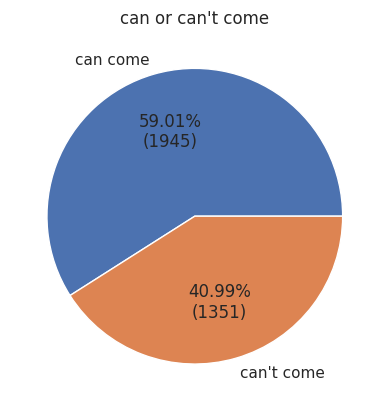

In [209]:
# count number of Defaulted and not
geo_enable_sample = sampled_df['geo_enabled'].value_counts()

# visualize using pie chart
plt.pie(geo_enable_sample, labels = ["can come","can't come"], autopct=lambda x:'{:.2f}%\n({:.0f})'.format(x, geo_enable_sample.sum()*x/100))
plt.title("can or can't come")
plt.show()

<b> Insights: </b>
* Most of the users geo enabled almost 60%  can come to watch the match.

In [210]:
sampled_df[["favourites_count","followers_count","friends_count","listed_count"]].skew()

favourites_count    16.895854
followers_count     38.359518
friends_count       36.387970
listed_count        36.782603
dtype: float64

<b>Insights:</b>
* outliers.
* The distribution of the data is appx symmetric there is  need for transformation.

In [211]:
# Transform the variables using np.log1p()
sampled_df['favourites_count'] = np.log1p(sampled_df['favourites_count'])
sampled_df['followers_count'] = np.log1p(sampled_df['followers_count'])
sampled_df['friends_count'] = np.log1p(sampled_df['friends_count'])
sampled_df['listed_count'] = np.log1p(sampled_df['listed_count'])

In [212]:
sampled_df[["favourites_count","followers_count","friends_count","listed_count"]].skew()

favourites_count   -0.920773
followers_count     0.473766
friends_count      -0.404276
listed_count        1.106313
dtype: float64

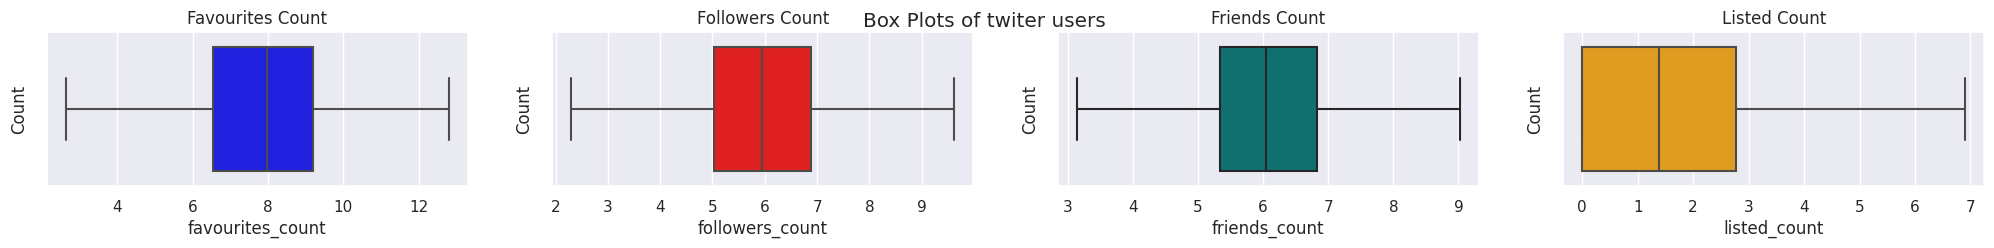

In [213]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1, 4, figsize=(25,2))

# Set subplot titles
axs[0].set_title('Favourites Count')
axs[1].set_title('Followers Count')
axs[2].set_title('Friends Count')
axs[3].set_title('Listed Count')

# Set x-axis and y-axis labels
axs[0].set_xlabel('Favourites Count')
axs[0].set_ylabel('Count')
axs[1].set_xlabel('Followers Count')
axs[1].set_ylabel('Count')
axs[2].set_xlabel('Friends Count')
axs[2].set_ylabel('Count')
axs[3].set_xlabel('Listed Count')
axs[3].set_ylabel('Count')

# Box plots without outliers
sns.boxplot(data=sampled_df, x='favourites_count', color="blue", ax=axs[0], showfliers=False)
sns.boxplot(data=sampled_df, x='followers_count', color="red", ax=axs[1], showfliers=False)
sns.boxplot(data=sampled_df, x='friends_count', color="teal", ax=axs[2], showfliers=False)
sns.boxplot(data=sampled_df, x="listed_count", color="orange", ax=axs[3], showfliers=False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Add a figure title
fig.suptitle('Box Plots of twiter users')

# Show the plot
plt.show()

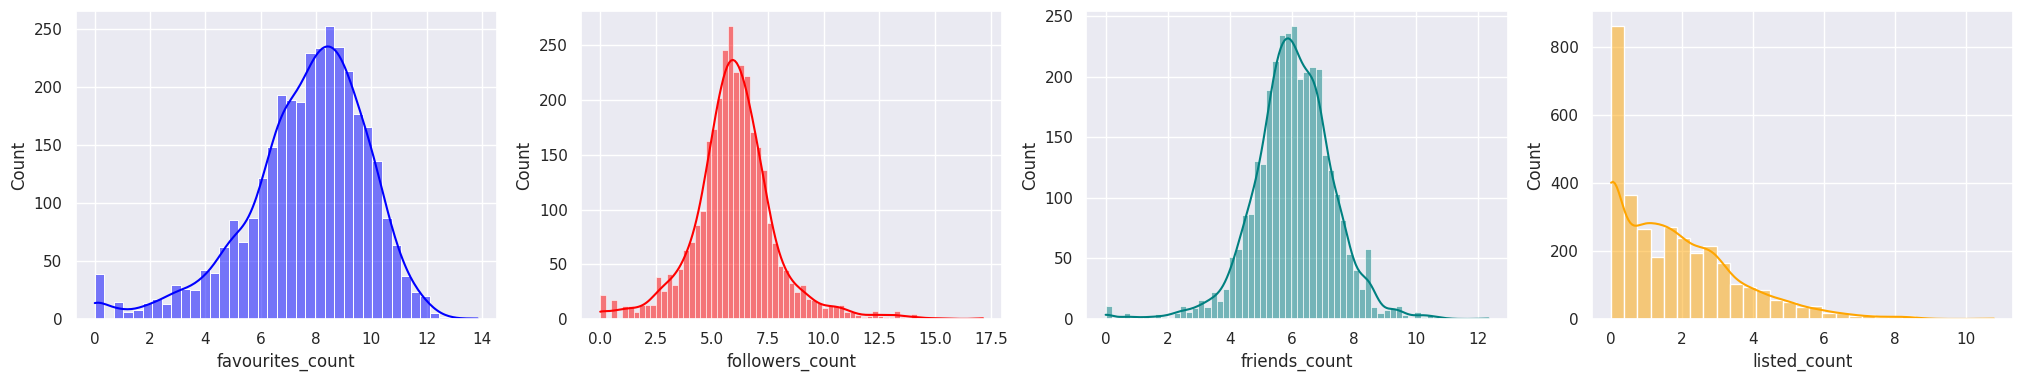

In [214]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,4, figsize=(25,4))

# inti a number of box plots
sns.histplot(data=sampled_df["favourites_count"], kde=True, ax=axs[0], color="blue")
sns.histplot(data=sampled_df["followers_count"], kde=True, ax=axs[1], color="red")
sns.histplot(data=sampled_df["friends_count"], kde=True, ax=axs[2], color="teal")
sns.histplot(data=sampled_df["listed_count"], kde=True, ax=axs[3], color="orange")

# Show the plot
plt.show()

#### 6.2.2 Bivariate analysis

#### Geo_enabeled related to users

In [215]:
# split by avg favourites
df_2 = sampled_df.copy()
df_2['favourites_count'] = df_2['favourites_count'].map(lambda x:'>=10750' if x >= 10750 else '<10750')

df_2['listed_count'] = df_2['listed_count'].map(lambda x:'>=70.0' if x >= 70 else '<70')
# split by avg followers
df_2['followers_count'] = df_2['followers_count'].map(lambda x:'>=21020' if x >= 21020 else '<21020')

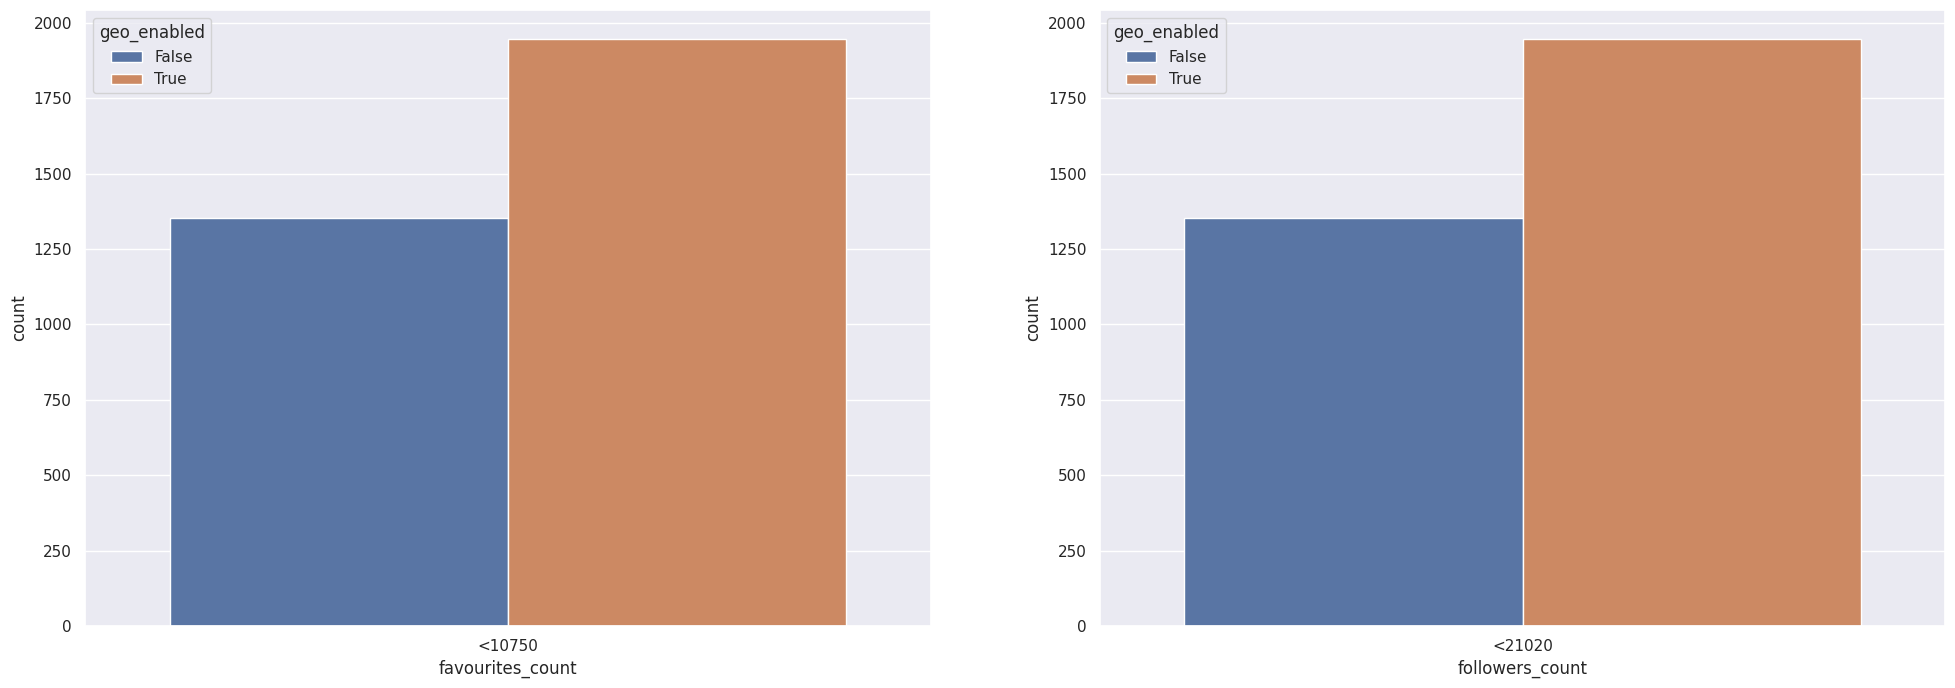

In [216]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 8))

# a number of count plots
sns.countplot(data=df_2, x = "favourites_count", hue="geo_enabled", ax = axs[0])
sns.countplot(data=df_2, x = "followers_count", hue="geo_enabled", ax = axs[1])

# Show the plot
plt.show()

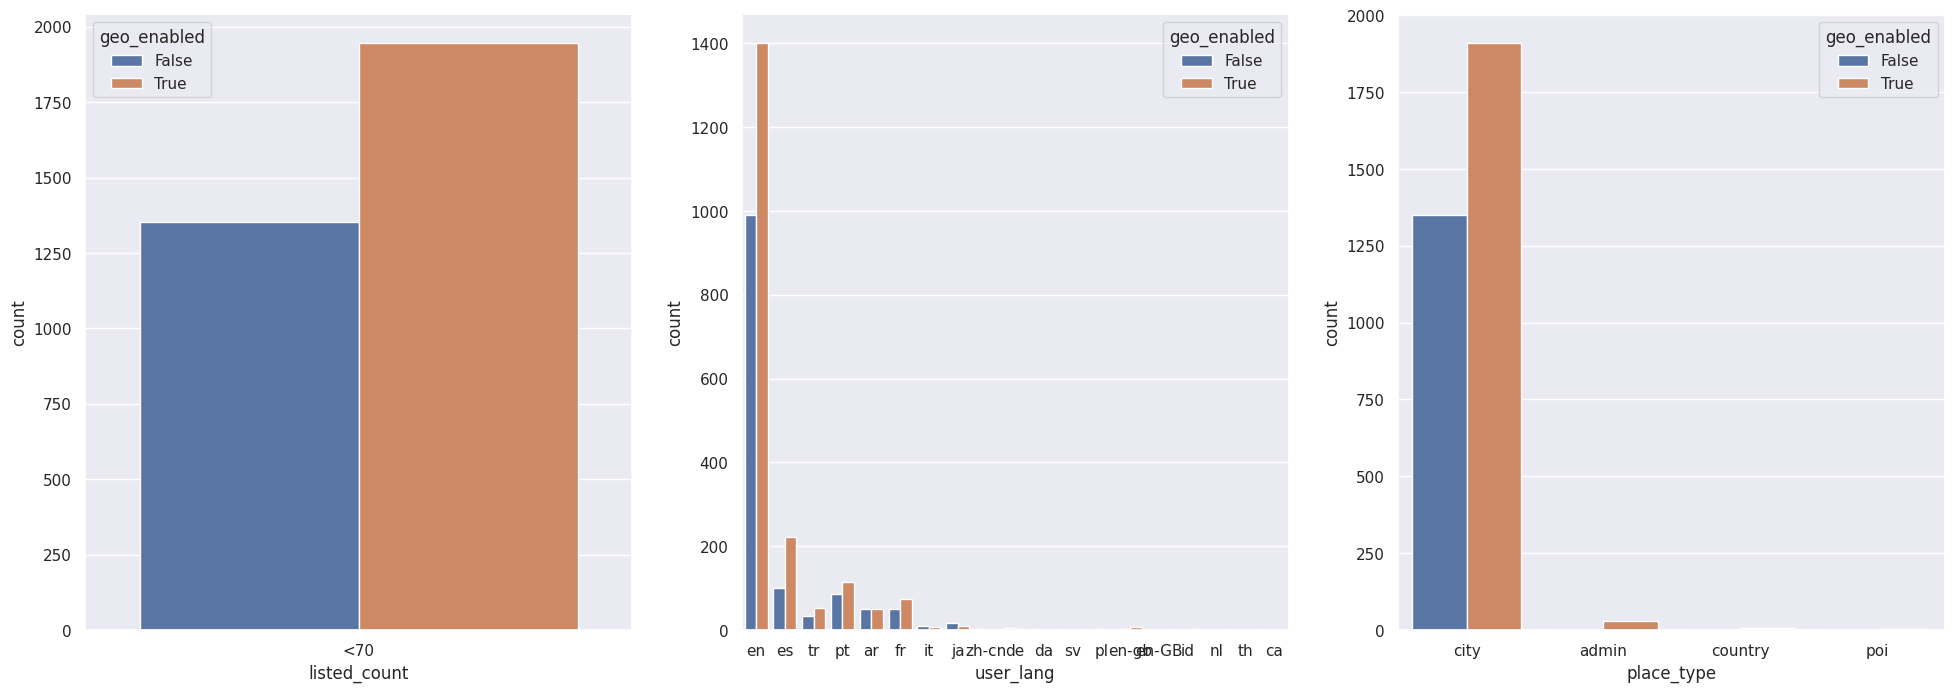

In [217]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,3, figsize=(24, 8))

# a number of count plots
sns.countplot(data=df_2, x="listed_count", hue="geo_enabled", ax=axs[0])
sns.countplot(data=df_2, x = "user_lang", hue="geo_enabled", ax = axs[1])
sns.countplot(data=df_2, x = "place_type", hue="geo_enabled", ax = axs[2])

# Show the plot
plt.show()

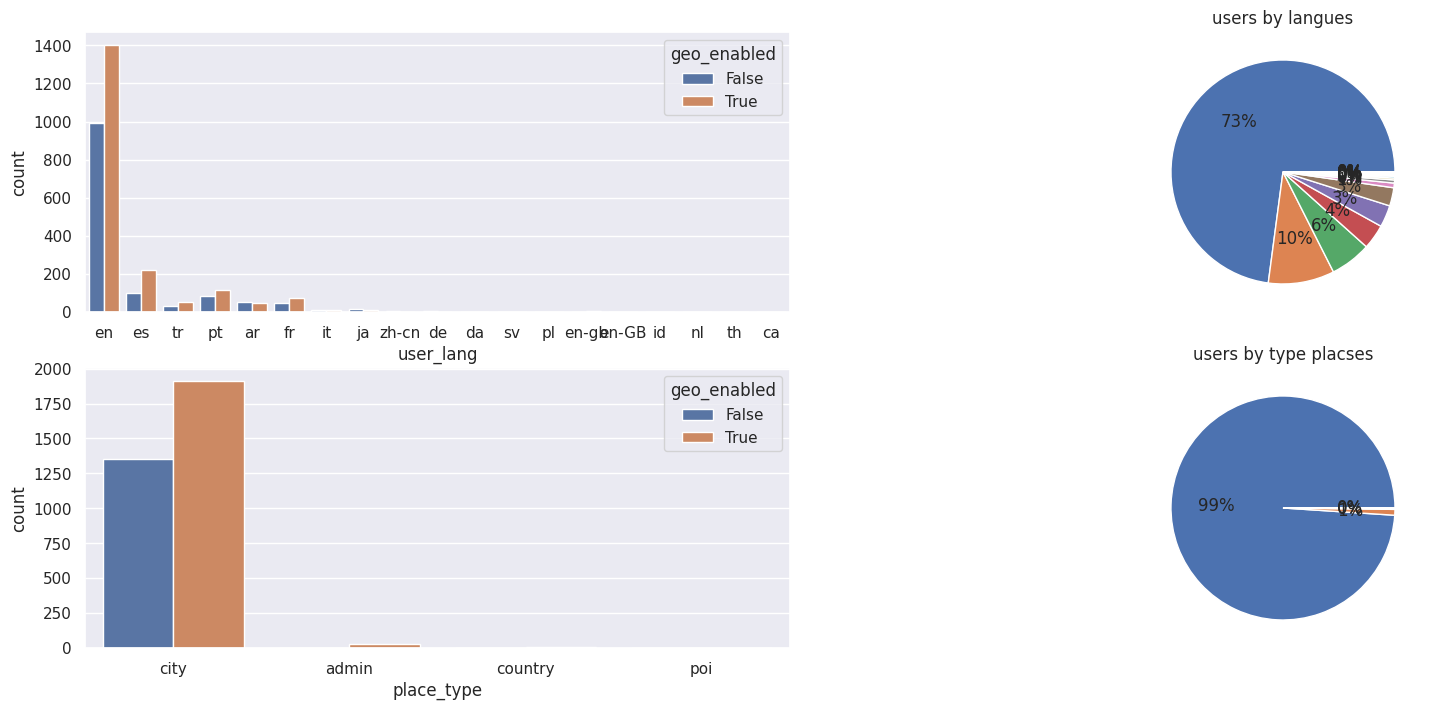

In [218]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(2,2, figsize=(20, 8))

# inti a number of count plots and pie plots
sns.countplot(data = df_2, x = 'user_lang', hue = "geo_enabled", ax = axs[0,0])
axs[0,1].pie(df['user_lang'].value_counts(), autopct='%1.f%%')
axs[0,1].set_title('users by langues')

sns.countplot(data = df_2, x = 'place_type', hue = "geo_enabled", ax = axs[1,0])
axs[1,1].pie(df['place_type'].value_counts(),  autopct='%1.f%%')
axs[1,1].set_title('users by type placses')

# Show the plot
plt.show()

**Insights:**
1.   almost 99% of users' twitter comments for the match live in the city.
2.  73 % of users' twitter comments for the match use English and  10% use Esbanesh.

###6.2.3coutry and city most commentted

In [219]:
len(df['location'].unique())

2765

In [220]:
pd.crosstab(df['location'], df['geo_enabled'], margins=True).sort_values(by=1, ascending=False).head()

geo_enabled,False,True,All
location,,,
All,2457,3536,5993
United States,872,739,1611
"Chicago, IL",9,23,32
Philippines,0,22,22
"Los Angeles, CA",15,22,37


In [221]:
pd.crosstab(df['location'], df['geo_enabled'], margins=True).sort_values(by=0, ascending=False).head()

geo_enabled,False,True,All
location,,,
All,2457,3536,5993
United States,872,739,1611
"Rio de Janeiro, Brasil",16,15,31
"Los Angeles, CA",15,22,37
laniakea,13,0,13


<b> Insights: </b>
* The users will come from 4 state Basically.
* users are the most from (los angelos)united states.

In [222]:
len(df['country'].unique())

31

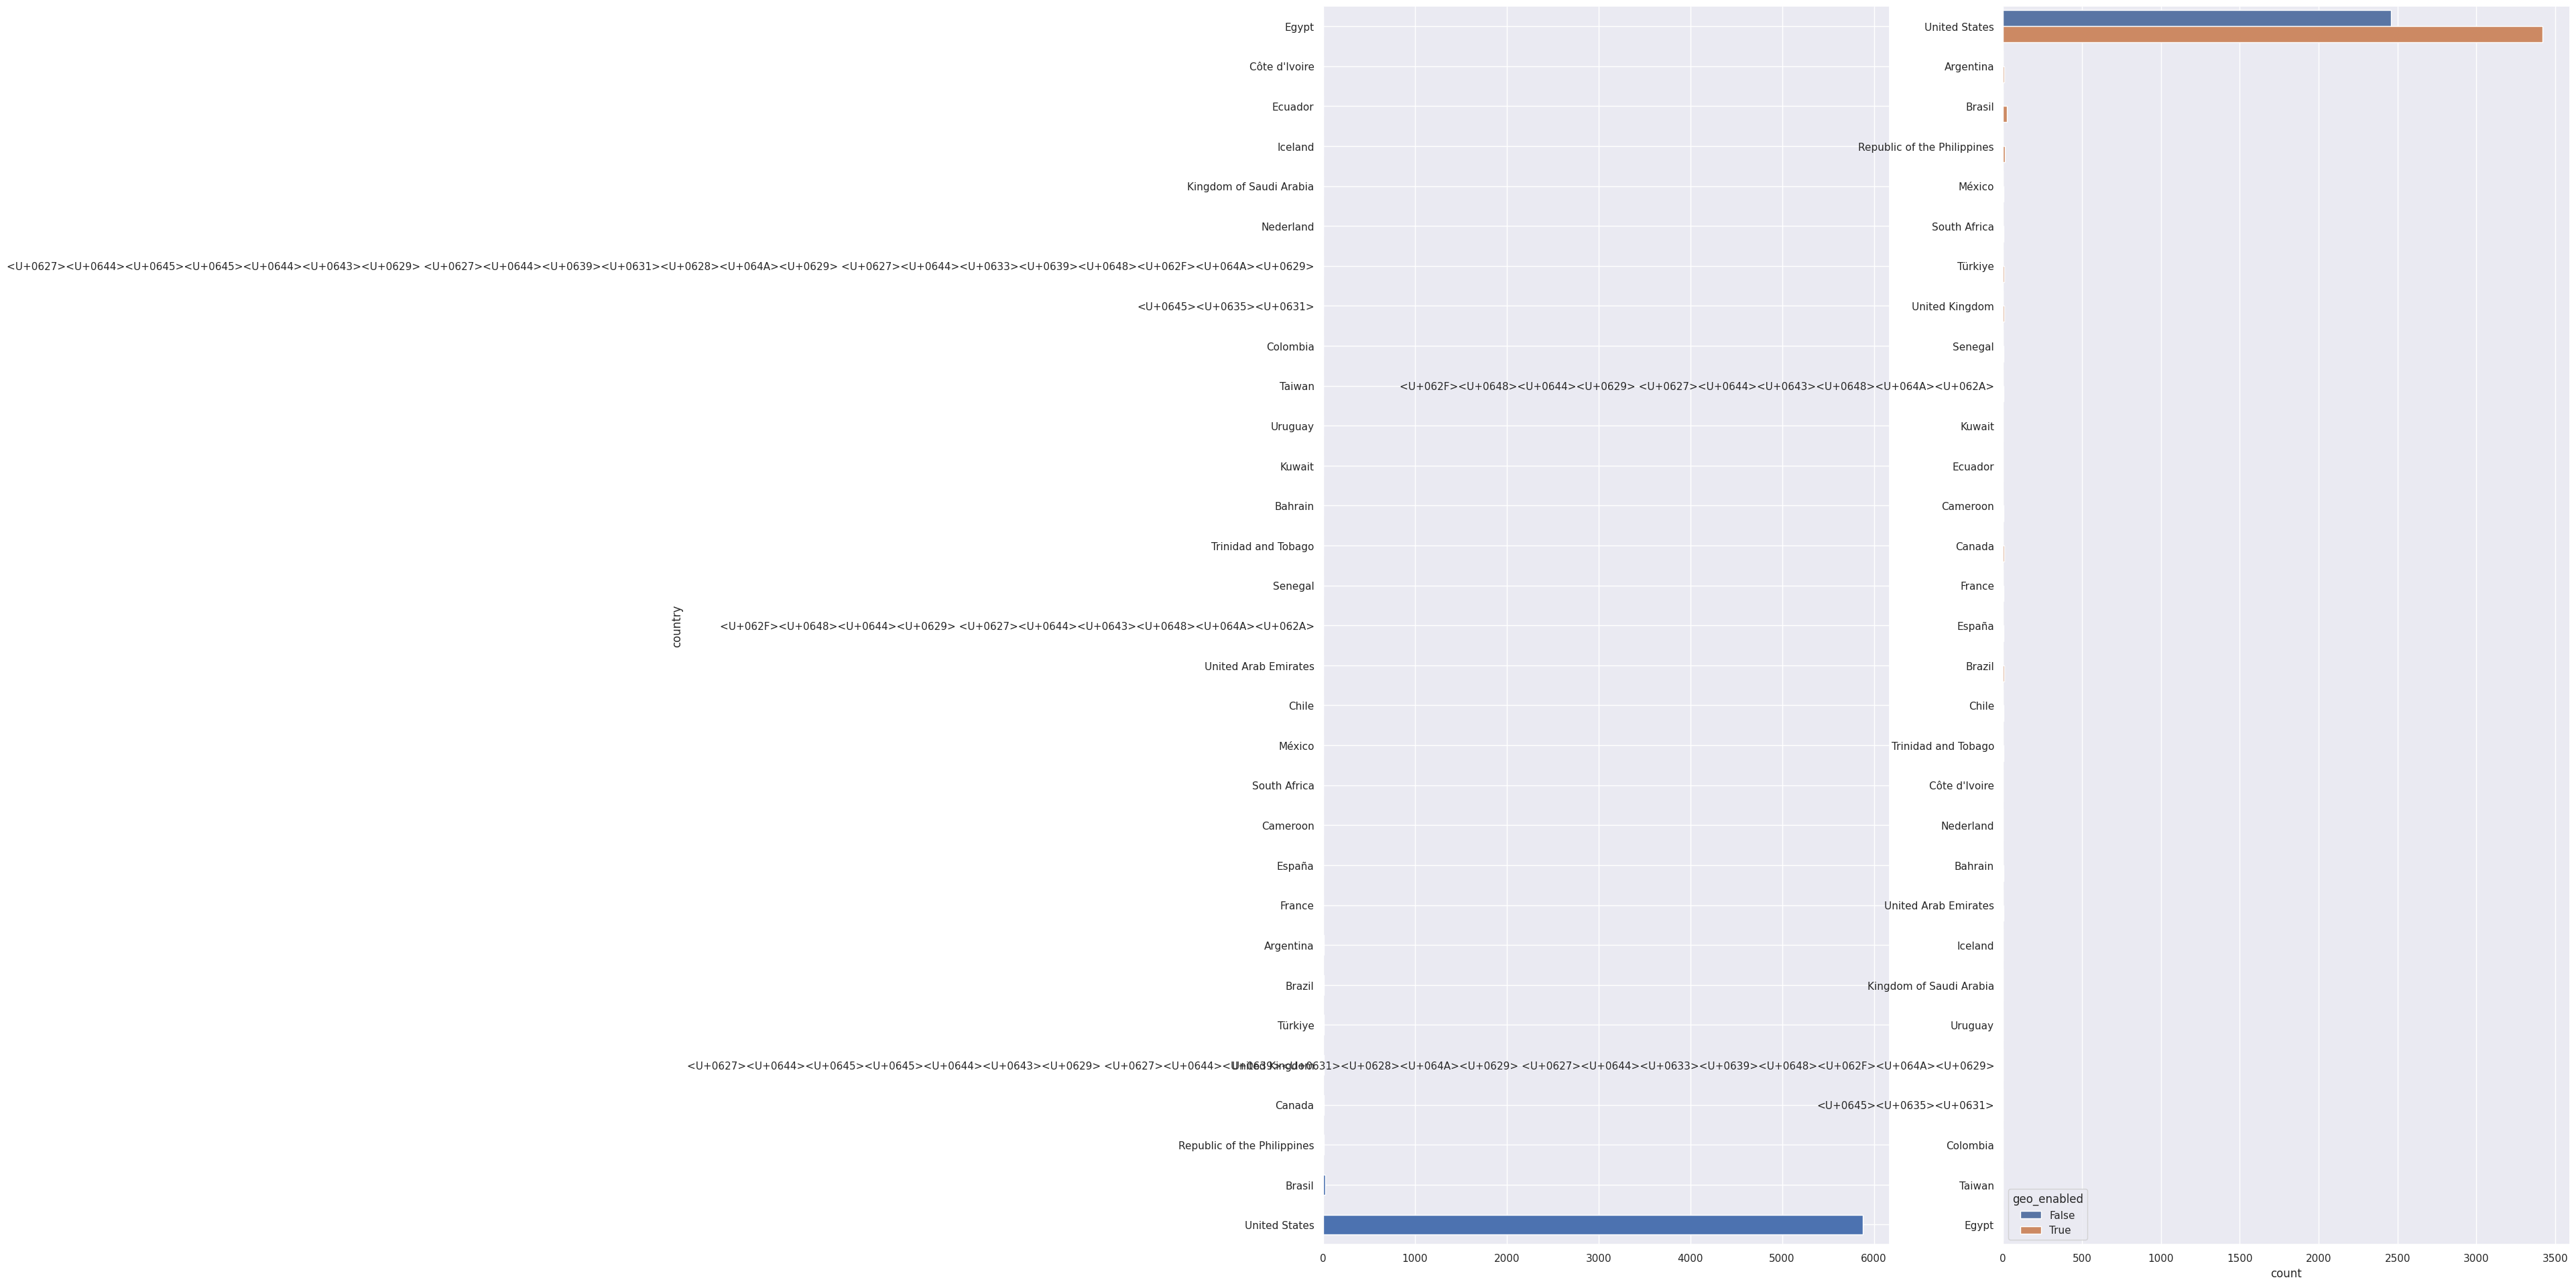

In [223]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 24))

# inti a number of count plots and barPlot
df['country'].value_counts().plot(kind='barh',ax=axs[0])
sns.countplot(y="country", data=df, hue='geo_enabled',ax = axs[1])

# Show the plot
plt.show()

In [224]:
pd.crosstab(df['country'], df['geo_enabled'], margins=True).sort_values(by=1, ascending=False).head()

geo_enabled,False,True,All
country,,,
All,2457,3536,5993
United States,2457,3421,5878
Brasil,0,24,24
Republic of the Philippines,0,10,10
Canada,0,9,9


In [225]:
pd.crosstab(df['country'], df['geo_enabled'], margins=True).sort_values(by=0, ascending=False).head()

geo_enabled,False,True,All
country,,,
All,2457,3536,5993
United States,2457,3421,5878
<U+062F><U+0648><U+0644><U+0629> <U+0627><U+0644><U+0643><U+0648><U+064A><U+062A>,0,2,2
Uruguay,0,1,1
United Kingdom,0,8,8


#7.Correlation

###7.1plotting

In [226]:

# Select numerical columns based on data types:
numerical_columns = df.select_dtypes(include=['number'])


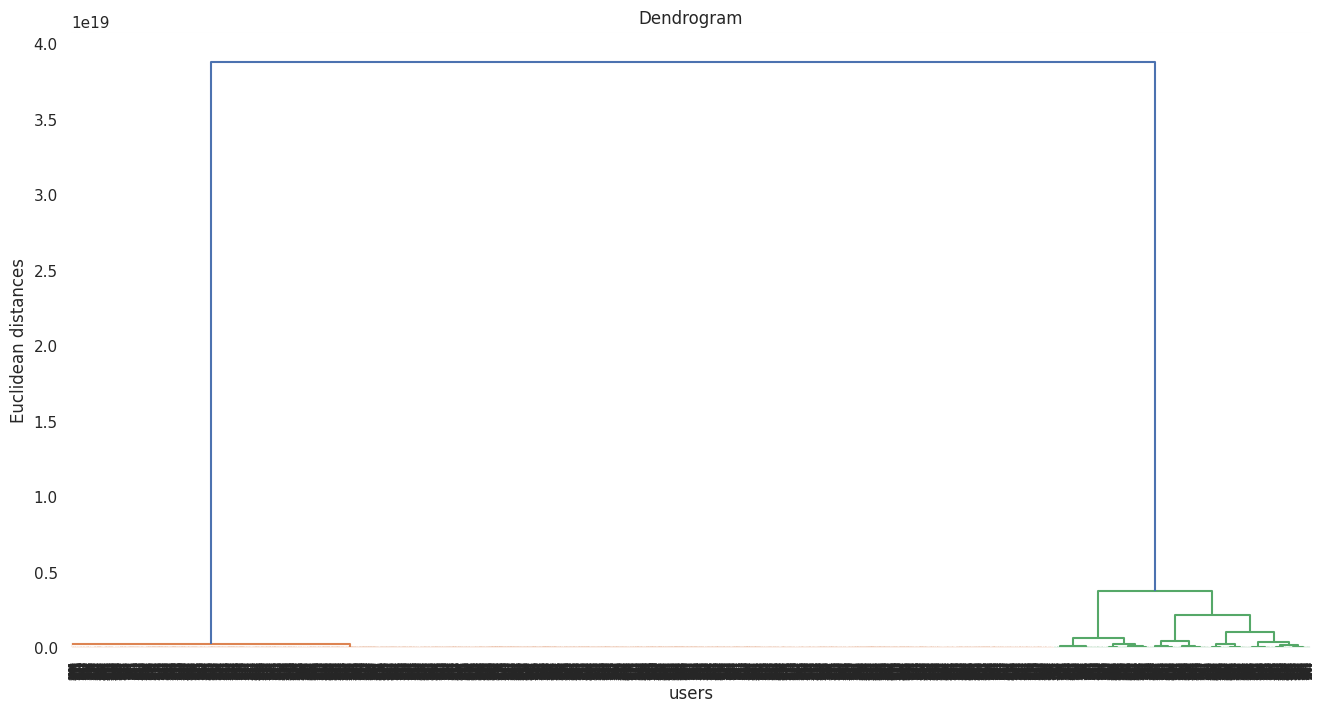

In [227]:
# importing the required module
import scipy.cluster.hierarchy as sch

# graph size
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(numerical_columns, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('users')
plt.ylabel('Euclidean distances')

plt.show()

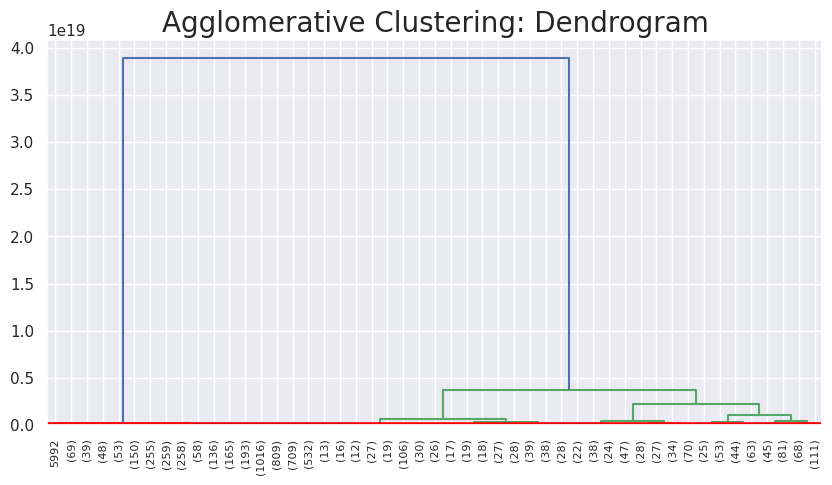

In [228]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_agc_pred = agc.fit_predict(numerical_columns)

# Plotting the Dendrogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Clustering: Dendrogram', fontsize=20)
dend = shc.dendrogram(shc.linkage(numerical_columns, method='ward'), truncate_mode='level', p=5)
plt.axhline(y=9, label='threshold', color='red', lw=4)
plt.show()

### **7.2Realtionship** between the variables.

In [229]:
df= df.drop(['text', 'truncated', 'id_str', 'source', 'retweeted', 'created_at',
       'in_reply_to_status_id_str', 'lang', 'location',
       'user_id_str', 'description', 'user_created_at',
        'protected','name', 'user_lang', 'screen_name', 'country',
       'place_type', 'place_name'],axis=1)

In [230]:
df.columns

Index(['listed_count', 'geo_enabled', 'statuses_count', 'followers_count',
       'favourites_count', 'friends_count'],
      dtype='object')

7.3correlation figure

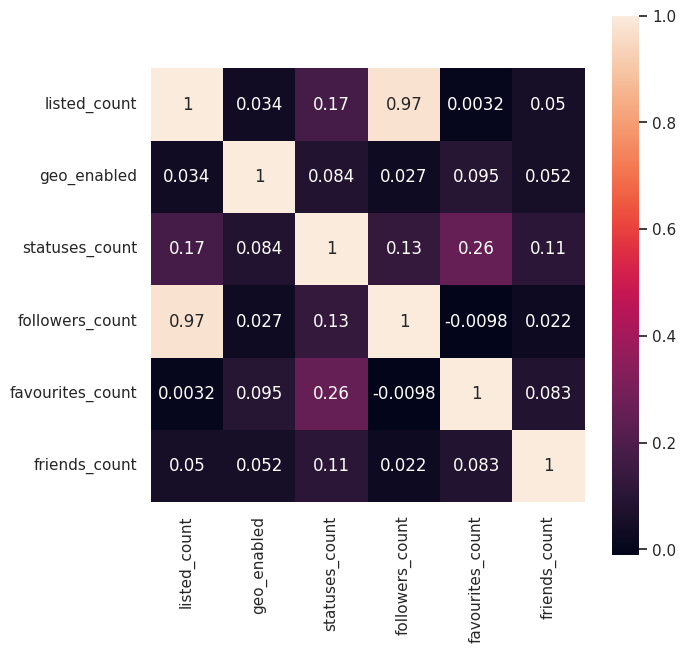

In [231]:
# calculate the correlation among the variables
corr_ = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(7, 7))

# Create a heatmap using Seaborn
sns.heatmap(corr_, annot=True, square=True)

# Show the plot
plt.show()

#8.modelling


### Logisitic Regression

In [232]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred3 = logreg.predict(x_test)
accuracy_score(y_pred3,y_test)

0.5929941618015012

### Naive Bayes


In [233]:
x = df.drop(["geo_enabled"], axis=1)
y = df["geo_enabled"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [234]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred4 = gnb.predict(x_test)
accuracy_score(y_pred4,y_test)

0.43869891576313597

### K-means

In [235]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(x_train,y_train)
y_pred2= clf.predict(x_test)
accuracy_score(y_pred2,y_test)

0.6430358632193495

### Descision Tree

In [236]:
from sklearn.tree import DecisionTreeClassifier
dst = DecisionTreeClassifier(random_state=0)
dst.fit(x_train,y_train)
y_pred5 = dst.predict(x_test)
accuracy_score(y_pred5,y_test)

0.6522101751459549